In [9]:
from pathlib import Path

import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from ak_diseq.glacierData import glacierData
from ak_diseq.data import load_rgi, load_mb
from ak_diseq.utils import detrend

In [10]:
gd = glacierData()
gd.calc_response_time()
gd.calc_linear_feq()
d = gd.rgi

In [11]:
rgi = load_rgi()

In [12]:
mb = load_mb()

/Users/drotto/src/ak_diseq/src/ak_diseq/data.py:47: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  wgms = pd.read_csv(fp, encoding='iso-8859-1')
/Users/drotto/micromamba/envs/ak_diseq/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/drotto/micromamba/envs/ak_diseq/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/drotto/src/ak_diseq/src/ak_diseq/data.py:181: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  mb_ek = mb_ek.apply(pd.to_numeric, errors='ignore')
/Users/drotto/src/ak_diseq/src/ak_diseq/data.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_49439/1932931902.py:40: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask = (g.Name == k) & (mask)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels 

Initial check (Detrended): Black Rapids Glacier 6.37
{'slope': 0.006373673818896578, 'intercept': -10.14111173022197, 'stderr': 0.00017612904765518125}
Black Rapids Glacier by year: 7.24
slope (95%): 6.695206, 6.099814
stderr: 0.15109958574757654
Dbdz using eband (dropping <3 obs ebands) Black Rapids Glacier 6.40, -11.98 

Initial check (Detrended): Columbia Glacier 6.42
{'slope': 0.006421512683940918, 'intercept': -4.669791618632194, 'stderr': 0.0005776557439877804}
Columbia Glacier by year: 5.91
Detrend failed for Columbia Glacier 150.0 m, nobs = 5
Detrend failed for Columbia Glacier 900.0 m, nobs = 3
slope (95%): 7.679442, 5.378019
stderr: 0.5673858381863136
Dbdz using eband (dropping <3 obs ebands) Columbia Glacier 6.53, -6.82 

Initial check (Detrended): East Yakutat Glacier 6.46
{'slope': 0.006464582894564278, 'intercept': -2.771930618599022, 'stderr': 0.0005635245568217327}
East Yakutat Glacier by year: 6.41
slope (95%): 7.575512, 5.380958
stderr: 0.5447966494917705
Dbdz using e

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_49439/1932931902.py:40: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask = (g.Name == k) & (mask)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/drotto/micromamba/envs/ak_diseq/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ss

Initial check (Detrended): Gulkana Glacier 7.77
{'slope': 0.0077734001841338, 'intercept': -12.897904254578009, 'stderr': 0.0002481379269615273}
Gulkana Glacier by year: 7.94
slope (95%): 8.053550, 7.059663
stderr: 0.25208616267122935
Dbdz using eband (dropping <3 obs ebands) Gulkana Glacier 7.56, -13.83 

Initial check (Detrended): Kahiltna Glacier 3.25
{'slope': 0.003251660665208156, 'intercept': -7.446981437631335, 'stderr': 0.000703186248424063}
Kahiltna Glacier by year: 3.25
slope (95%): 4.914432, 1.588889
stderr: 0.703186248424063
Dbdz using eband (dropping <3 obs ebands) Kahiltna Glacier 3.25, -7.45 

Initial check (Detrended): Lemon Creek Glacier 10.48
{'slope': 0.010479229140342706, 'intercept': -11.313375779914132, 'stderr': 0.0013146827826135586}
Lemon Creek Glacier by year: 10.43
slope (95%): 13.179952, 7.757559
stderr: 1.33926323248974
Dbdz using eband (dropping <3 obs ebands) Lemon Creek Glacier 10.47, -12.32 

Initial check (Detrended): Mendenhall Glacier 9.90
{'slope': 

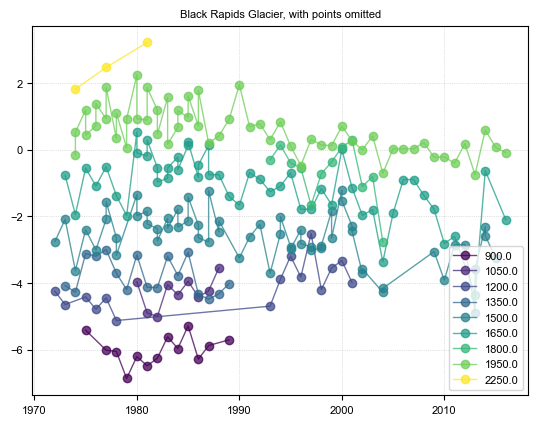

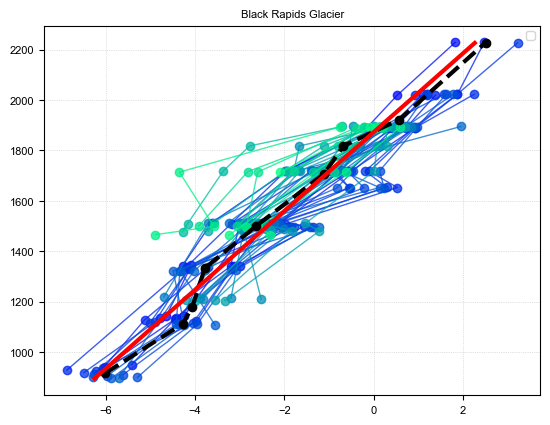

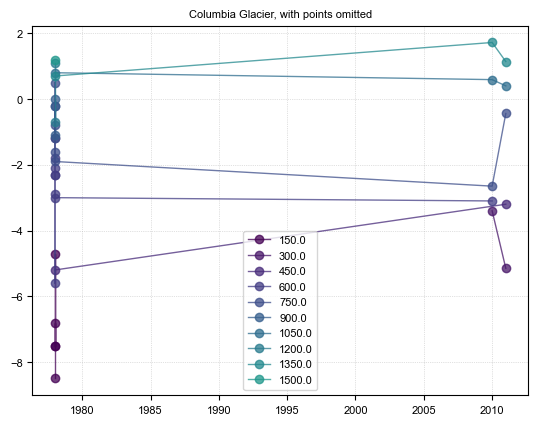

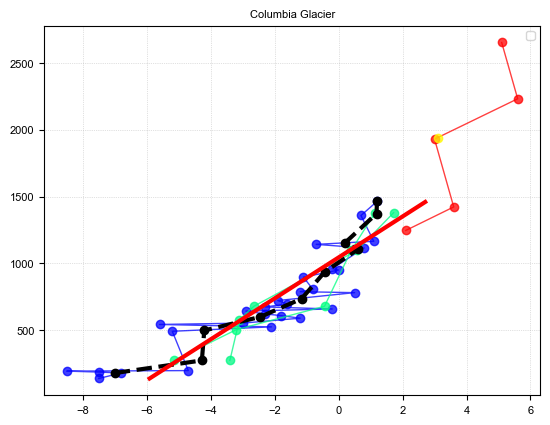

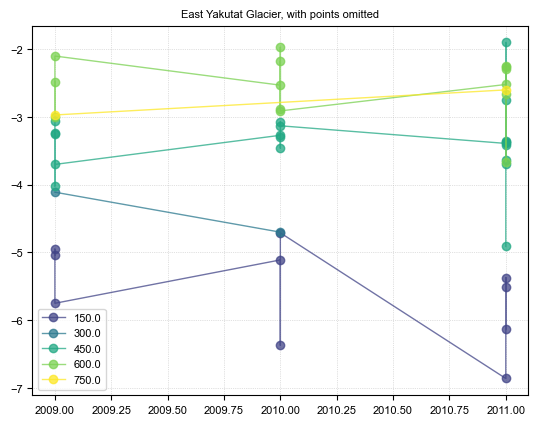

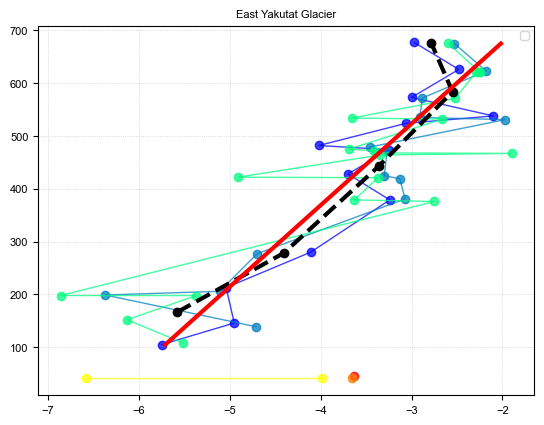

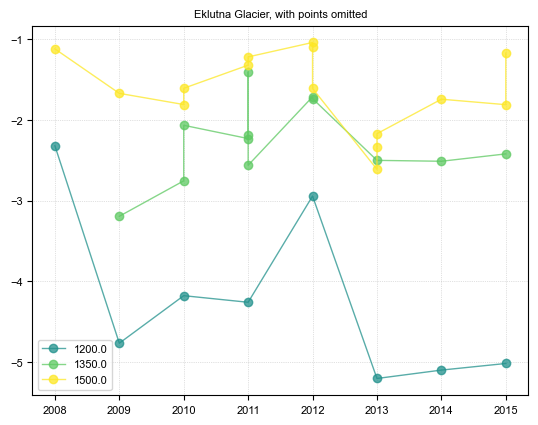

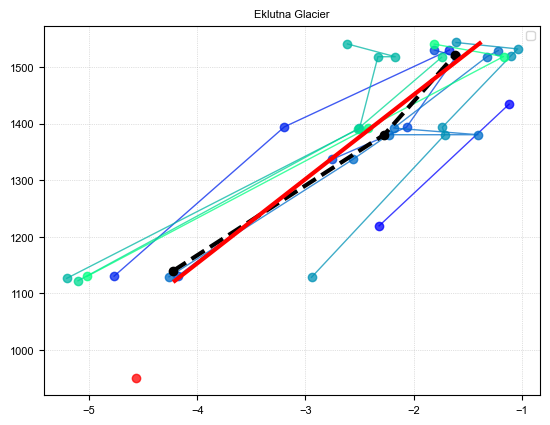

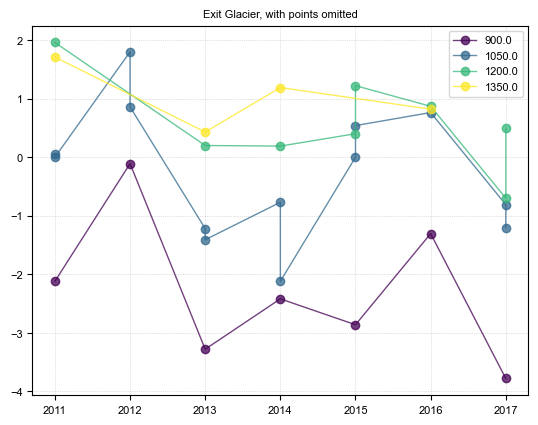

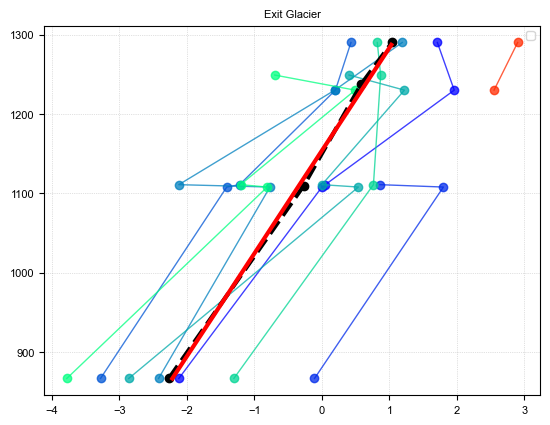

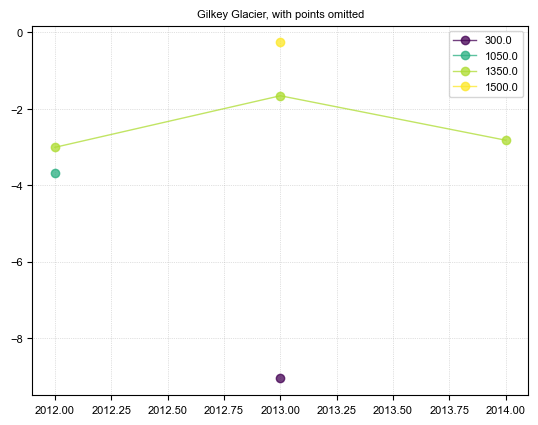

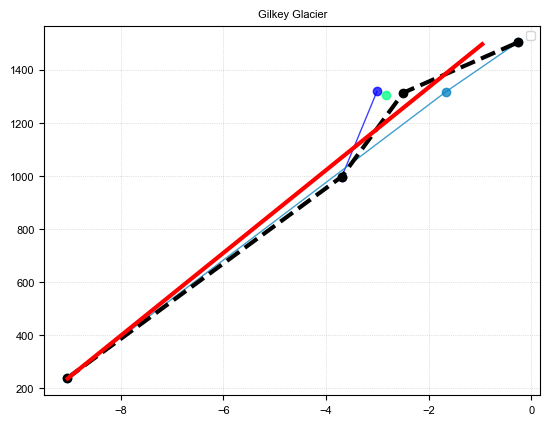

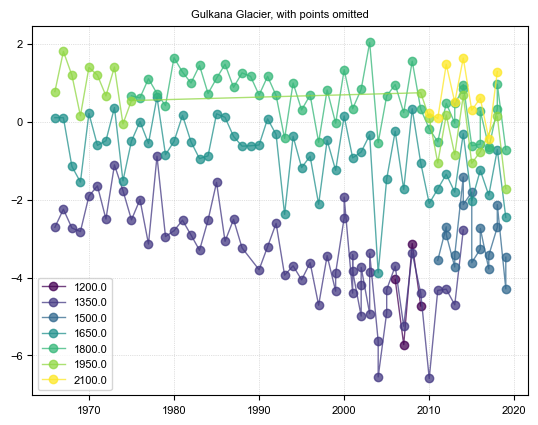

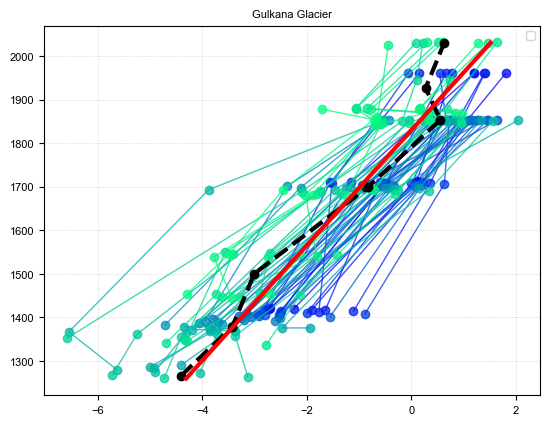

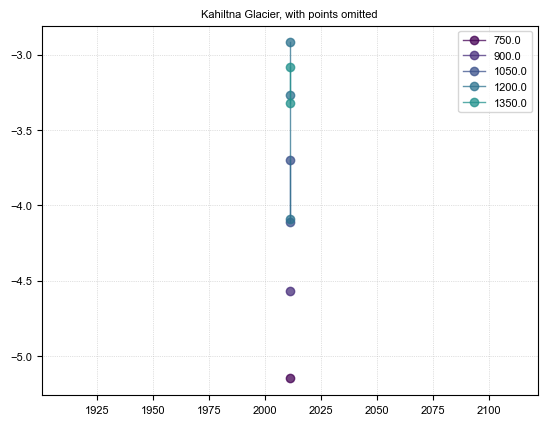

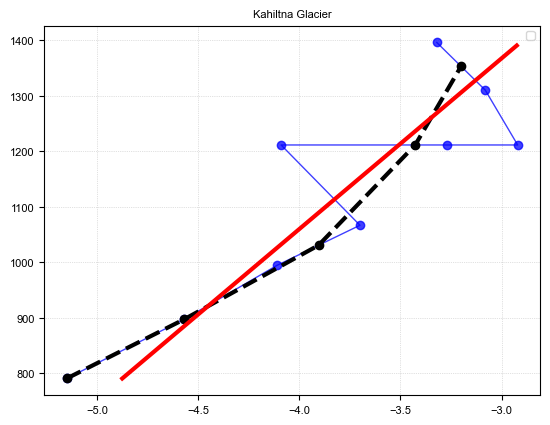

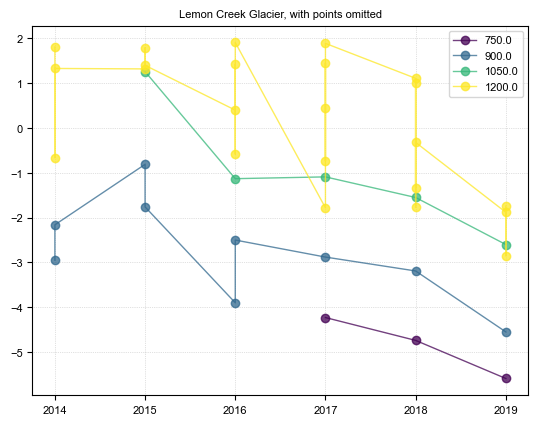

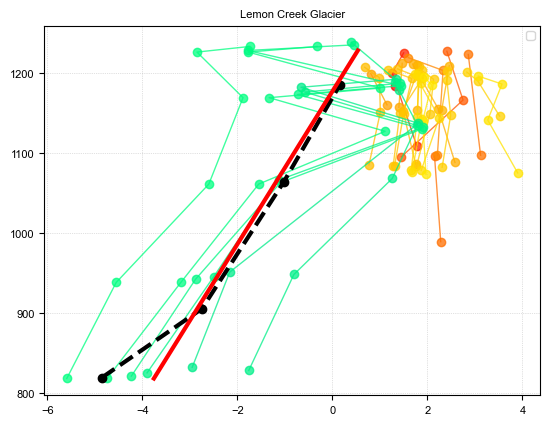

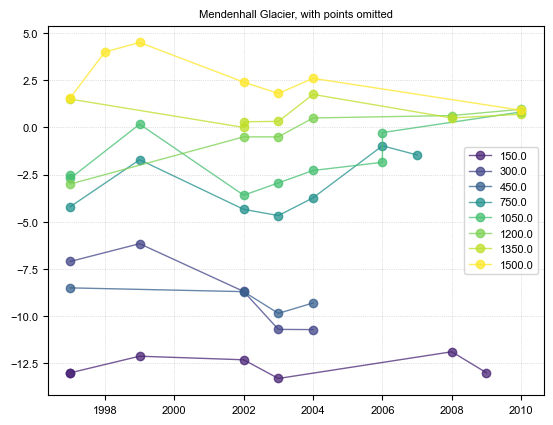

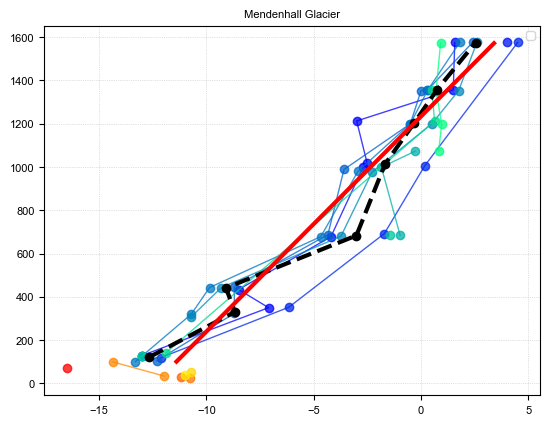

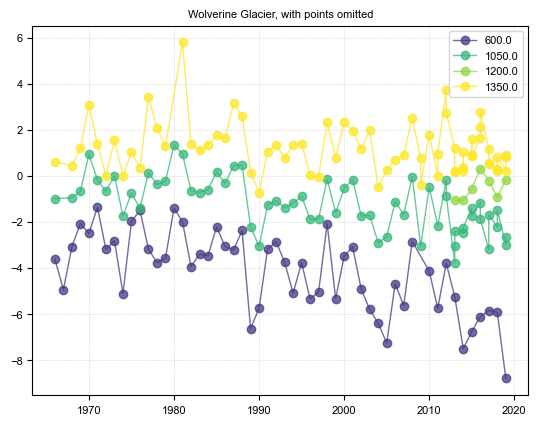

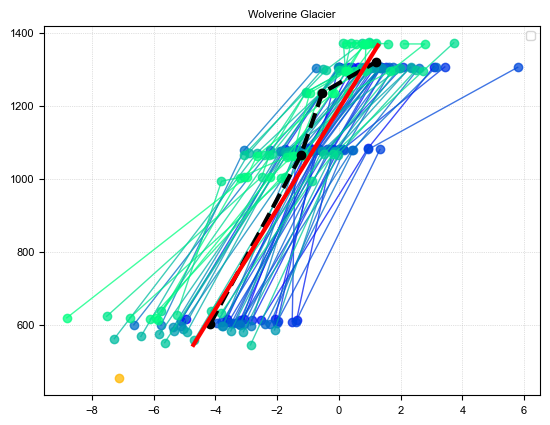

In [13]:
m = mb.loc[mb.BALANCE_CODE == 'BA', :].copy()

dbdz_concat = {}
obs =[]
for k, g in m.groupby('Name'):
    # group points
    base = 150
    g['eband'] = (g['POINT_ELEVATION']/base).round() * base

    # screen bad data
    mask = [True]  # default state, filter nothing
    if k == 'Taku Glacier':
        mask = (g.point_swe_m < 4) & (g.point_swe_m > 0)
        continue
    if k == 'Gilkey Glacier':
        pass
        
    if k == 'East Yakutat Glacier':
        
        mask = (g.POINT_ELEVATION > 100)
    if k == 'Wolverine Glacier':
        mask = (g.POINT_ELEVATION > 500)
    if k == 'Kahiltna Glacier':
        mask = (g.POINT_ELEVATION < 1500)
    if k == 'Eklutna Glacier':
        g.loc[g.eband == 1050., "eband"] = 1200  # manual correction for a 2014 point that was getting lumped into 1050 m bin with elevation 1120 m.
        mask = (g.POINT_ELEVATION > 1100)
        
    if k == 'Mendenhall Glacier':
        mask = (g.POINT_ELEVATION > 100)
    if k == 'Lemon Creek Glacier':
        #pass
        mask = (~g.omit)
    if k == 'Columbia Glacier':
        # pass 
        mask = (g.point_swe_m < 2)
    if k == 'Exit Glacier':
        # pass 
        mask = (g.point_swe_m < 2)
    mask = (g.Name == k) & (mask)


    # plot eband over time
    g = g.sort_values('YEAR')
    fig, ax = plt.subplots(1,1)
    norm = mpl.colors.Normalize(vmin=g.eband.min(), vmax=g.eband.max())
    for eband, gg in g.loc[mask].groupby('eband'):
        ax.plot(gg.YEAR, gg.point_swe_m, c=mpl.colormaps['viridis'](norm(eband)), marker='o', alpha=0.75, label=eband)
    ax.set_title(f"{k}, with points omitted")
    ax.legend()

    # viz balance profiles
    fig, ax = plt.subplots(1, 1)
    g = g.sort_values(by='POINT_ELEVATION')
    norm = mpl.colors.Normalize(vmin=g.YEAR.min(), vmax=g.YEAR.max())
    for year, gg in g.groupby('YEAR'):
        gg_omit = gg.loc[~mask]
        gg = gg.loc[mask]
        ax.plot(gg_omit['point_swe_m'], gg_omit['POINT_ELEVATION'], c=mpl.colormaps['autumn'](norm(year)), marker='o', alpha=0.75)
        ax.plot(gg['point_swe_m'], gg['POINT_ELEVATION'], c=mpl.colormaps['winter'](norm(year)), marker='o', alpha=0.75)
        
    # mask out values from analysis
    g = g.loc[mask]
    
    ######################
    # calculate the dbdz
    ######################
    x = g['POINT_ELEVATION']
    y = g['point_swe_m']
    if k not in ['Kahiltna Glacier']:
        y = detrend(y, g['YEAR'])
    ols = sci.stats.linregress(x, y)
    yhat = ols.intercept + x * ols.slope
    print("Initial check (Detrended):", k, f"{ols.slope*1000:.2f}")
    dbdz = {"slope": ols.slope, "intercept": ols.intercept, "stderr": ols.stderr}
    print(dbdz)

    ######################
    # do dbdz by year, aka assuming each year is NOT noise around the same dbdz
    # silly way to avoid detrending
    ######################
    dbdz_yr = {}
    for year, gg in g.groupby('YEAR'):
        x = gg['POINT_ELEVATION']
        y = gg['point_swe_m']
        ols = sci.stats.linregress(x, y)
        if ~np.isnan(ols.slope):
            dbdz_yr[year] = ols.slope
    print(k, f"by year: {np.mean(list(dbdz_yr.values()))*1000:.2f}")


    # check dbdz using eband
    # detrend by eband
    concat = []
    if k not in ['Kahiltna Glacier']:
        for e, gg in g.groupby('eband'):
            if len(gg) >= 3:
                try:
                    swe_mean = gg['point_swe_m'].mean()
                    gg['point_swe_m'] = detrend(gg['point_swe_m'], gg['YEAR']) + swe_mean
                except:
                    print(f"Detrend failed for {k} {e} m, nobs = {len(gg)}")
            concat.append(gg)
        g = pd.concat(concat, ignore_index=True)
    x = g['POINT_ELEVATION']
    y = g['point_swe_m']
    ols = sci.stats.linregress(x, y)
    df = len(x)
    tinv = lambda p, df: abs(sci.stats.t.ppf(p/2, df))
    tstar = tinv(0.05, len(x)-2)
    print(f"slope (95%): {(ols.slope + tstar*ols.stderr)*1000:.6f}, {(ols.slope - tstar*ols.stderr)*1000:.6f}")
    print(f"stderr: {ols.stderr*1000}")
    yhat = ols.intercept + x * ols.slope
    print("Dbdz using eband (dropping <3 obs ebands)", k, f"{ols.slope*1000:.2f}, {ols.intercept:.2f} \n")
    #print(g.loc[:, ['POINT_ELEVATION', 'point_swe_m', 'Name', 'nobs']])

    # group by eband
    counts = g.groupby('eband')['point_swe_m'].count()
    ebands = g.groupby('eband').mean(numeric_only=True)
    ebands['Name'] = k
    ebands['nobs'] = counts

    # plot eband grouped balance profile
    ax.plot(ebands['point_swe_m'], ebands['POINT_ELEVATION']
            , c='black', marker='o', alpha=1, ls='--', lw=3)
    x = np.arange(g['POINT_ELEVATION'].min(), g['POINT_ELEVATION'].max(), 10)
    ax.plot(ols.intercept + ols.slope * x, x, lw=3, c='red')
    ax.set_title(k)
    ax.legend()
    
    # I'm just going to replace the intercept for the initial fit with the one from the eband fit. The slope from the initial fit is the one that is important, but we want the line to go through the points on the plot. 
    dbdz['intercept'] = ols.intercept 
    dbdz['ebands'] = ebands.copy()
    dbdz['points'] = g.copy()
    obs.append(g)
    dbdz_concat[k] = dbdz
obs = pd.concat(obs)

Black Rapids Glacier
0.006373673818896578 -11.981510117217956 0.17612904765518125
        POINT_ELEVATION  point_swe_m  nobs
eband                                     
900.0        917.076923    -6.006923    13
1050.0      1113.444444    -4.272222     9
1200.0      1180.733333    -4.060200    15
1350.0      1333.058824    -3.780000    17
1500.0      1501.000000    -2.628700    60
1650.0      1707.720000    -1.109620    50
1800.0      1817.750000    -0.682167    12
1950.0      1922.303571     0.571446    56
2250.0      2227.666667     2.503333     3
Columbia Glacier
0.006421512683940918 -6.8238142832775415 0.5776557439877804
        POINT_ELEVATION  point_swe_m  nobs
eband                                     
150.0        180.600000    -7.000000     5
300.0        275.000000    -4.275000     2
450.0        499.000000    -4.200000     2
600.0        600.700000    -2.450000    10
750.0        736.714286    -1.155714     7
900.0        937.000000    -0.433333     3
1050.0      1105.333333 

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_49439/3991875564.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_yticklabels(labels)


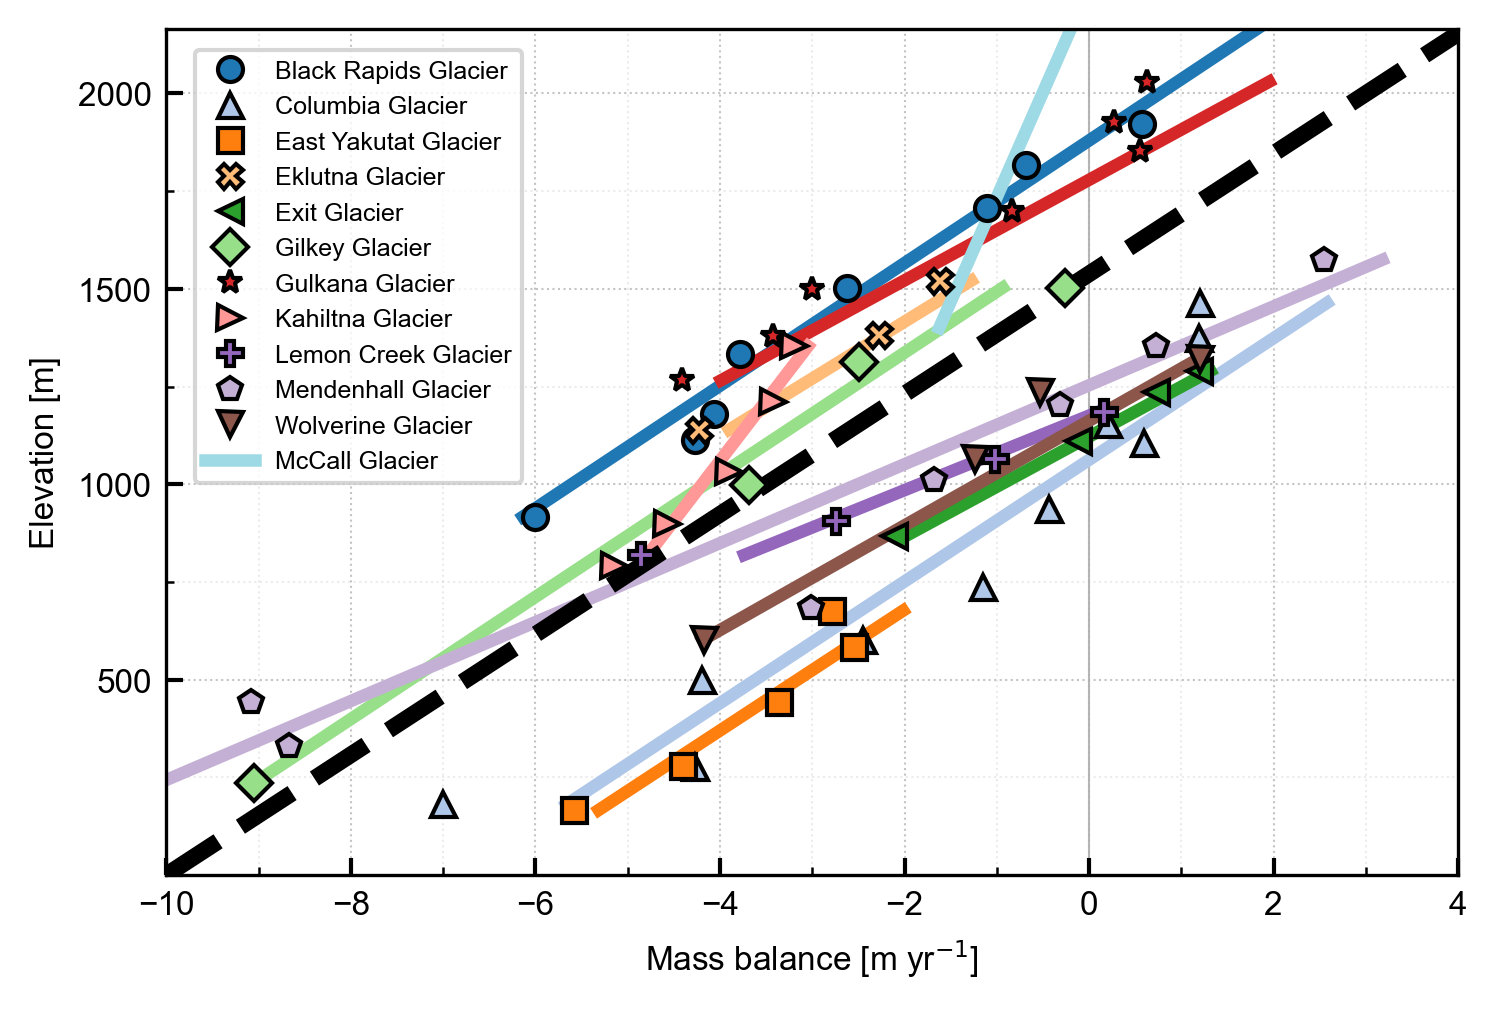

In [14]:
plt.style.use("default")

XXSMALL_SIZE = 6
XSMALL_SIZE = 8
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)  # contr
plt.rc('font', family="sans-serif")  # controls default font face
plt.rcParams["font.sans-serif"] = ['Arial']
plt.rc('axes', titlesize=XSMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=XSMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=XSMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=XSMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=XSMALL_SIZE)  # legend fontsize
plt.rc("axes", grid=True)
plt.rc('axes.grid', which="both", axis='both')
plt.rc('grid', linestyle=':', lw=0.5, alpha=0.75)
plt.rc("lines", lw=1)

colors = plt.cm.tab20(np.linspace(0, 1, 20))
markers = ['o', '^', 's', 'X', '<',  'D', '*', '>', 'P', 'p', 'v', 'h']

fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4.875, 3.25), layout='constrained')
for i, (k, dbdz) in enumerate(dbdz_concat.items()):
    
    g = dbdz['ebands'].copy()
    b0 = dbdz['intercept'].copy()

    # manual adjustments
    if k == 'Exit Glacier':
        b0 += 0.15
        g['point_swe_m'] += 0.15
        pass

    print(k)
    print(dbdz['slope'], b0, dbdz['stderr']*1000)
    print(g.loc[:, ['POINT_ELEVATION', 'point_swe_m', 'nobs']])
    rgi_row = rgi.loc[(rgi.Name == k), :].iloc[0]
    xmin = g['POINT_ELEVATION'].min()
    xmax = g['POINT_ELEVATION'].max()
    x = np.linspace(xmin, xmax, 3)
    yhat = b0 + x * dbdz['slope']
    
    ax.plot(
        yhat,
        x,
        lw=3,
        color=colors[i],
#        zorder=2.01
    )
    ax.plot(
        g['point_swe_m'],
        g['POINT_ELEVATION'],
        marker=markers[i],
        markersize=6,
        fillstyle='full',
        markeredgecolor='black',
        markeredgewidth=1,
        color=colors[i],
        linewidth=1,
        ls='',
        label=k,
        zorder=2.01
    )

# McCall glacier
slope_a = 0.00172  # m swe / m
slope_b = 0.00201  # m swe / m
slope = (slope_a + slope_b)/2
y0 = 1400
y1 = 2500
dy = 2500-1400
x0 = (-1.4 + -1.85)/2
x1 = x0 + dy*slope
ax.plot([x0, x1], [y0, y1], label='McCall Glacier', lw=3, color=colors[-1])

ax.axline(
    xy1=(-10, 0),
    slope=1 / 0.0065,
    color='black',
    ls='--',
    lw=4,
    zorder=2.00,
)
ax.set_xlim(-10, 4)
ax.set_ylim(0, 2165)
ax.set_xlabel('Mass balance [m yr$^{-1}$]')
ax.set_ylabel('Elevation [m]')
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(250))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(500))
#ax.grid(which='major', axis='both', ls='-', lw=0.5)
ax.grid(which='minor', axis='both', ls=':', lw=0.5, alpha=0.25)
ax.tick_params(axis='both', which='both', direction='in', length=2)
ax.tick_params(axis='both', which='major', length=4, width=1)
ax.tick_params(axis="both", which="minor", labelleft=False)
ax.legend(fontsize=XXSMALL_SIZE, loc='upper left', bbox_to_anchor=(0.0125, 0.99))
ax.axvline(0, lw=0.5, alpha=1, c="#B6B6B6", zorder=0)
fig.canvas.draw()

# remove bottom ylabel
for axis in [ax]:
    labels = [item for item in axis.get_yticklabels()]
    labels[1].set_text('')
    print(labels)
    axis.set_yticklabels(labels)


plt.savefig(Path('Fig4.svg'), bbox_inches='tight')
plt.savefig(Path('Fig4.png'), bbox_inches='tight')
plt.savefig(Path('Fig4.pdf'),bbox_inches='tight')

In [15]:
# number of obs
nobs = obs.loc[~obs.Name.isin([''])].pivot_table(index='Name', values='point_swe_m', aggfunc=lambda x: x.count())

# number of years
nyears = obs.loc[~obs.Name.isin([''])].pivot_table(index='Name', values='YEAR', aggfunc=lambda x: x.nunique())

# dbdzs
# lazy unpack
slopes = {}
for k, v in dbdz_concat.items():
    slopes[k] = f"{v['slope']*1000:.2f}"
slopes = pd.Series(slopes)

# year range
yr_range = obs.loc[~obs.Name.isin([''])].pivot_table(index='Name', values='YEAR', aggfunc=lambda x: f"{int(x.min())}-{int(x.max())}")
yr_range.columns = ['Years evaluated']

obs_zrange = obs.loc[~obs.Name.isin([''])].pivot_table(index='Name', values='POINT_ELEVATION', aggfunc=lambda x: f"{int(x.min())}-{int(x.max())} ({int(x.max() - x.min())})")

rgi = rgi.sort_values(by='Name')
rgi_zrange = rgi.loc[rgi.Name.isin(obs_zrange.index)].apply(lambda x: f"{x['Zmin']}-{x['Zmax']} ({x['Zmax'] - x['Zmin']})", axis=1)
rgi_zrange.index = obs_zrange.index

d = d.sort_values(by='Name')
bt = d.loc[rgi.Name.isin(obs_zrange.index), 'bt']
#bt.index = obs_zarange.index


In [16]:
table = pd.concat([slopes, nobs, nyears, yr_range, obs_zrange, rgi_zrange], axis=1)
table.columns = ['dbdz [m km]', 'N obs', 'N years', 'Years evaluated', 'Elevations evaluated (dz)', 'Glacier elevation (dz)']
table.to_csv(Path('TableA2.csv'))

table

,dbdz [m km],N obs,N years,Years evaluated,Elevations evaluated (dz),Glacier elevation (dz)
Black Rapids Glacier,6.37,235,45,1972-2016,896-2228 (1332),722-3081 (2359)
Columbia Glacier,6.42,38,3,1978-2011,140-1464 (1324),0-3693 (3693)
East Yakutat Glacier,6.46,47,3,2009-2011,105-677 (572),28-1669 (1641)
Eklutna Glacier,6.88,35,8,2008-2015,1122-1543 (421),543-2050 (1507)
Exit Glacier,7.81,32,7,2011-2017,867-1290 (423),122-1604 (1482)
Gilkey Glacier,6.40,6,3,2012-2014,236-1502 (1266),107-2359 (2252)
Gulkana Glacier,7.77,212,54,1966-2019,1260-2031 (771),1162-2438 (1276)
Kahiltna Glacier,3.25,9,1,2011-2011,790-1396 (605),264-5134 (4870)
Lemon Creek Glacier,10.48,40,6,2014-2019,818-1238 (420),676-1494 (818)
Mendenhall Glacier,9.90,52,11,1997-2010,101-1574 (1473),94-1966 (1872)
